In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!ls

drive  sample_data


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy
from matplotlib import pyplot as plt

In [5]:
%cd "/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest"

/content/drive/.shortcut-targets-by-id/1DvKtVWZtXjoE10GFyC28K1eLj25rZXwa/Grupo TAC/TA-FINAL/images/nottingham_forest


In [6]:
import os
file_names_hamster = list()
target_hamster = list()
ruta="/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest/hamster"
for image_file in os.listdir(ruta):
  file_name_hamster = os.path.join(ruta, image_file)
  file_names_hamster.append(file_name_hamster)
  target_hamster.append(0)

  # print(file_name)
print(len(file_names_hamster))

114


In [7]:
import os
file_names_mouse = list()
target_mouse = list()
ruta="/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest/mouse"
for image_file in os.listdir(ruta):
  file_name_mouse = os.path.join(ruta, image_file)
  file_names_mouse.append(file_name_mouse)
  target_mouse.append(1)

  # print(file_name)
print(len(file_names_mouse))

131


In [8]:
import os
file_names_rabbit = list()
target_rabbit = list()
ruta="/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest/rabbit"
for image_file in os.listdir(ruta):
  file_name_rabbit = os.path.join(ruta, image_file)
  file_names_rabbit.append(file_name_rabbit)
  target_rabbit.append(2)

  # print(file_name)
print(len(file_names_rabbit))

100


In [9]:
import os
file_names_shrew = list()
target_shrew = list()
ruta="/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest/shrew"
for image_file in os.listdir(ruta):
  file_name_shrew = os.path.join(ruta, image_file)
  file_names_shrew.append(file_name_shrew)
  target_shrew.append(3)

  # print(file_name)
print(len(file_names_shrew))

105


In [10]:
import os
file_names_squirrel = list()
target_squirrel = list()
ruta="/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/nottingham_forest/squirrel"
for image_file in os.listdir(ruta):
  file_name_squirrel = os.path.join(ruta, image_file)
  file_names_squirrel.append(file_name_squirrel)
  target_squirrel.append(4)

  # print(file_name)
print(len(file_names_squirrel))

101


In [11]:
x_images=file_names_hamster+file_names_mouse+file_names_rabbit+file_names_shrew+file_names_squirrel
y_images=target_hamster+target_mouse+target_rabbit+target_shrew+target_squirrel

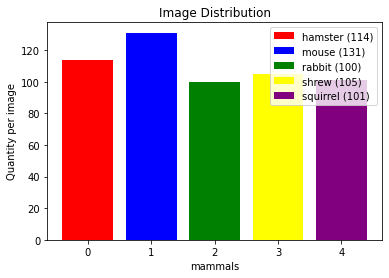

In [12]:
import seaborn as sns
hamster_num=len(file_names_hamster)
mouse_num=len(file_names_mouse)
rabbit_num=len(file_names_rabbit)
shrew_num=len(file_names_shrew)
squirrel_num=len(file_names_squirrel)

plt.bar(0,len(file_names_hamster), label="hamster ("+str(len(file_names_hamster))+")", color='r')
plt.bar(1,len(file_names_mouse), label="mouse ("+str(len(file_names_mouse))+")", color='b')
plt.bar(2,len(file_names_rabbit), label="rabbit ("+str(len(file_names_rabbit))+")", color='g')
plt.bar(3,len(file_names_shrew), label="shrew ("+str(len(file_names_shrew))+")", color='yellow')
plt.bar(4,len(file_names_squirrel), label="squirrel ("+str(len(file_names_squirrel))+")", color='purple')
plt.plot()

plt.xlabel("mammals")
plt.ylabel("Quantity per image")
plt.title("Image Distribution")
plt.legend()
plt.show()

In [13]:
n=0
open_imagen_x=list()
open_imagen_y=list()
for x in x_images:
  n=n+1
  # print(x)
  # print(n)
  original_image = cv2.imread(x)
  open_imagen_x.append(original_image.shape[0])
  open_imagen_y.append(original_image.shape[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


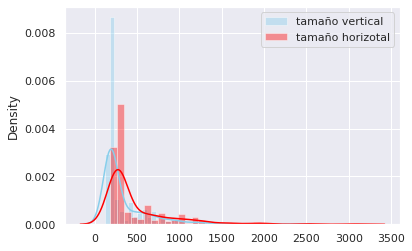

Media vertical:  345.2686025408348
Media horizontal:  479.82758620689657


In [14]:
import seaborn as sns
open_imagen_x=numpy.array(open_imagen_x)
open_imagen_y=numpy.array(open_imagen_y)
sns.set(style="darkgrid")
sns.distplot(open_imagen_x,color="skyblue", label="tamaño vertical")
sns.distplot(open_imagen_y,color="red", label="tamaño horizotal")
plt.legend() 
plt.show()
print("Media vertical: ",open_imagen_x.mean())
print("Media horizontal: ",open_imagen_y.mean())

In [15]:
n=0
new_size=224 
open_resized=list()
for x in x_images:
  n=n+1
  orignal_image = cv2.imread(x)
  image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
  resized_image = cv2.resize(image , (new_size,new_size))
  open_resized.append(resized_image)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

labels = label_encoder.fit_transform(y_images)

In [17]:
number_of_labels = len(label_encoder.classes_)

assert number_of_labels == 5, "La cantidad de labels debe ser igual a 5"

In [18]:
from sklearn.model_selection import train_test_split

images = np.array(open_resized)

x_train, x_test, labels_train, labels_test= train_test_split(images,labels, test_size=0.15, random_state=100, stratify=labels)

In [ ]:
print(labels_train)

[0 1 0 1 3 1 4 3 4 3 3 1 2 1 2 4 0 1 3 2 2 0 0 4 1 1 2 1 2 3 2 3 3 1 3 3 4
 1 3 2 4 1 1 2 1 1 2 3 0 0 2 0 1 0 2 4 0 2 1 1 0 1 2 3 1 3 0 1 2 3 1 3 0 1
 3 0 1 0 2 4 2 1 0 0 2 4 1 2 1 0 2 4 4 1 1 1 4 4 0 1 2 2 1 2 2 3 0 4 4 2 1
 1 3 0 2 1 2 1 2 4 2 4 2 1 2 2 1 3 2 3 2 2 4 0 1 0 2 0 2 4 4 0 0 4 0 4 1 3
 3 2 1 3 4 3 0 1 4 1 2 3 3 4 4 1 1 0 3 4 3 3 0 4 2 4 3 2 1 0 1 1 0 4 3 0 2
 4 4 4 1 4 3 2 3 1 1 2 0 2 3 3 1 3 3 4 1 1 4 2 0 1 1 0 4 1 2 3 3 4 3 1 4 1
 0 1 0 3 2 1 0 1 4 0 4 0 3 1 1 1 1 3 0 0 4 3 1 1 4 1 4 3 1 2 2 2 4 2 1 2 2
 2 0 3 4 3 0 3 0 0 4 4 3 4 1 1 0 1 3 2 0 3 4 4 0 0 0 1 3 2 3 1 3 4 3 3 1 0
 3 0 4 1 0 3 0 2 0 4 2 0 2 1 1 4 3 1 4 4 4 3 2 2 4 1 1 3 3 1 0 3 3 0 0 0 1
 3 0 4 4 2 0 0 0 0 2 3 3 2 4 1 4 0 0 3 1 2 4 0 2 3 3 0 2 2 3 0 2 4 2 4 3 0
 3 4 1 0 1 3 4 2 3 1 2 4 0 1 3 3 1 0 3 2 1 1 0 0 4 4 0 4 1 0 1 0 0 1 3 0 2
 0 1 0 3 4 2 1 1 4 4 0 2 4 4 2 0 0 2 1 1 1 3 0 4 0 3 3 3 1 3 4 2 1 4 2 4 1
 2 1 2 0 1 1 0 1 4 4 0 1 0 3 4 3 4 2 3 0 0 4 0 2]


In [ ]:
x_train.shape, labels_train.shape

((468, 224, 224, 3), (468,))

In [ ]:
x_test.shape, labels_test.shape

((83, 224, 224, 3), (83,))

In [ ]:
import collections

print(f'Distribution in training set: \n{collections.Counter(labels_train)}\n\n'+
      f'Distribution in testing set: \n{collections.Counter(labels_test)}')

Distribution in training set: 
Counter({1: 111, 0: 97, 3: 89, 4: 86, 2: 85})

Distribution in testing set: 
Counter({1: 20, 0: 17, 3: 16, 4: 15, 2: 15})


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv3D, MaxPool3D, Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, SeparableConv2D, MaxPooling2D, Add, Conv2DTranspose, UpSampling2D, Input, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD

K.clear_session()

input_layer = Input(shape=(224,224, 3))

labels_layer = Activation("relu")(input_layer)

labels_layer = Conv2D(128, 3, strides=2, padding="same")(labels_layer)
labels_layer = BatchNormalization()(labels_layer)
labels_layer = Activation("swish")(labels_layer)
labels_layer = Dropout(0.2)(labels_layer)
labels_layer = MaxPooling2D(3, strides=2, padding="same")(labels_layer)
labels_layer = MaxPooling2D(3, strides=2, padding="same")(labels_layer)

labels_layer = Conv2D(64, 3, strides=2, padding="same")(labels_layer)
labels_layer = Dropout(0.2)(labels_layer)
labels_layer = BatchNormalization()(labels_layer)
labels_layer = Activation("relu")(labels_layer)
labels_layer = Dropout(0.3)(labels_layer)  

labels_layer = Dense(32, activation="relu")(labels_layer)
labels_layer = Dropout(0.2)(labels_layer)
labels_layer = Dense(16, activation="relu")(labels_layer)
labels_layer = Dropout(0.5)(labels_layer)
labels_layer = Dense(8, activation="relu")(labels_layer)

labels_layer = Flatten()(labels_layer)

labels_layer = Dense(5, activation="softmax", name="labels")(labels_layer)

model = Model(inputs=input_layer, outputs=(labels_layer))

In [ ]:
len(model.layers)

20

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 activation (Activation)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 128)    512       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 112, 112, 128)     0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 128)     0         
                                                             

In [ ]:
epochs = 100
batch_size = 120
learning_rate = 0.001

In [ ]:
def show_metric(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_acc']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['acc'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  for ax in axes: ax.legend()

In [ ]:
train_targets = {"labels": labels_train}
print(labels_train.shape)

test_targets = {"labels": labels_test}

(451,)


In [ ]:
history = model.fit(x_train, train_targets, batch_size=batch_size, epochs=epochs, validation_data=(x_test, test_targets))

Epoch 1/100
4/4 [==============================] - 42s 9s/step - loss: 1.8923 - acc: 0.1907 - val_loss: 3.0083 - val_acc: 0.2000
Epoch 2/100
4/4 [==============================] - 39s 10s/step - loss: 1.7724 - acc: 0.2151 - val_loss: 2.1856 - val_acc: 0.1625
Epoch 3/100
4/4 [==============================] - 40s 10s/step - loss: 1.7001 - acc: 0.2129 - val_loss: 2.2401 - val_acc: 0.2375
Epoch 4/100
4/4 [==============================] - 40s 10s/step - loss: 1.6719 - acc: 0.2173 - val_loss: 2.3274 - val_acc: 0.2500
Epoch 5/100
4/4 [==============================] - 38s 9s/step - loss: 1.6491 - acc: 0.2461 - val_loss: 2.2481 - val_acc: 0.3000
Epoch 6/100
4/4 [==============================] - 40s 10s/step - loss: 1.6538 - acc: 0.2572 - val_loss: 2.1106 - val_acc: 0.2750
Epoch 7/100
4/4 [==============================] - 38s 9s/step - loss: 1.6026 - acc: 0.2594 - val_loss: 1.9633 - val_acc: 0.3000
Epoch 8/100
4/4 [==============================] - 38s 9s/step - loss: 1.5802 - acc: 0.2727 -

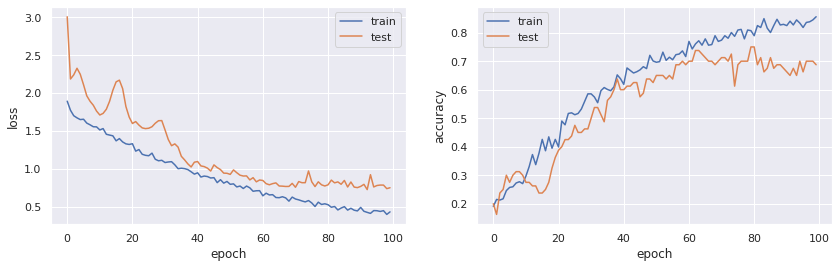

In [ ]:
show_metric(history)

In [ ]:
%mkdir model
model.save('/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/model')

mkdir: cannot create directory ‘model’: File exists
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grupo TAC/TA-FINAL/images/model/assets


In [20]:
import tensorflow as tf
model_predict=tf.keras.models.load_model('/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/model_mammals')

In [21]:
image=cv2.imread("/content/drive/MyDrive/Grupo TAC/TA-FINAL/images/pruebas/squ_2.jpg", 3)

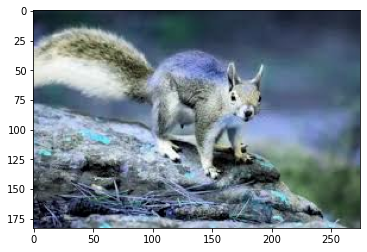

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image , (224,224))
print(type(resized_image))
prdiction = model_predict.predict(resized_image[None,:])

<class 'numpy.ndarray'>


In [ ]:
prdiction

array([[0.01233012, 0.07350295, 0.20452142, 0.08081158, 0.6288339 ]],
      dtype=float32)

In [19]:
label_dict={
  0: "hamster",
  1: "mouse",
  2: "rabbit",
  3: "shrew",
  4: "squirrel"
}

In [ ]:
label_dict[prdiction.argmax()]

'squirrel'

In [22]:
from sklearn.metrics import classification_report


In [23]:
label_train_predictions=model_predict.predict(x_train).argmax(axis=1)
label_test_predictions=model_predict.predict(x_test).argmax(axis=1)

In [24]:
label_train_predictions.shape,label_test_predictions.shape

((468,), (83,))

In [25]:
print(classification_report(labels_train, label_train_predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        97
           1       0.90      0.77      0.83       111
           2       0.72      0.98      0.83        85
           3       0.88      0.74      0.80        89
           4       0.92      0.69      0.79        86

    accuracy                           0.83       468
   macro avg       0.84      0.83      0.83       468
weighted avg       0.85      0.83      0.83       468



In [26]:
print(classification_report(labels_test, label_test_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.88      0.75      0.81        20
           2       0.79      1.00      0.88        15
           3       0.75      0.75      0.75        16
           4       0.71      0.67      0.69        15

    accuracy                           0.78        83
   macro avg       0.78      0.79      0.78        83
weighted avg       0.79      0.78      0.78        83

